<a href="https://colab.research.google.com/github/anish3565/QML/blob/main/Quantum_SVM/PD_Using_SVM_vs_QSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit-algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 3.7 MB/s eta 0:00:00


In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_machine_learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=72981c2f24b542b1714237d9adb708f9d60ba3d171b39764a180f8d509b8fa3d
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 4.1 MB/s eta 0:00:00


In [ ]:
from qiskit_machine_learning.utils import algorithm_globals

algorithm_globals.random_seed = 12345

Attribute Information:

Matrix column entries (attributes):
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%)
- MDVP:Jitter(Abs)
- MDVP:RAP
- MDVP:PPQ
- Jitter:DDP

Several measures of variation in fundamental frequency
- MDVP:Shimmer
- MDVP:Shimmer(dB)
- Shimmer:APQ3
- Shimmer:APQ5
- MDVP:APQ
- Shimmer:DDA - Several measures of variation in amplitude
NHR, HNR - Two measures of the ratio of noise to tonal components in the voice
status - The health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE, D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [ ]:
import pandas as pd

In [ ]:
url="https://raw.githubusercontent.com/SayamAlt/Parkinson-s-Disease-Detection/refs/heads/main/parkinsons.csv"
df=pd.read_csv(url)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
X=df.drop(['name','status'],axis=1)
y=df['status']


from sklearn.model_selection import train_test_split
from qiskit_machine_learning.utils import algorithm_globals

print(X.shape)
print(y.shape)

# Split into training and test sets
train_features, test_features, train_labels, test_labels = train_test_split(
    X, y, test_size=0.2, random_state=algorithm_globals.random_seed)

# Convert to NumPy arrays for compatibility with Qiskit ML models
train_features = train_features.to_numpy()
train_labels = train_labels.to_numpy()
test_features = test_features.to_numpy()
test_labels = test_labels.to_numpy()

(195, 22)
(195,)


In [ ]:
train_features

array([[1.088070e+02, 1.346560e+02, 1.028740e+02, ..., 2.055580e-01,
        1.986899e+00, 3.167000e-01],
       [1.861630e+02, 1.977240e+02, 1.775840e+02, ..., 2.010950e-01,
        2.374073e+00, 1.305540e-01],
       [1.930300e+02, 2.089000e+02, 8.029700e+01, ..., 2.786790e-01,
        2.608749e+00, 1.856680e-01],
       ...,
       [1.022730e+02, 1.428300e+02, 8.590200e+01, ..., 3.967460e-01,
        2.560422e+00, 3.672330e-01],
       [1.200780e+02, 1.266320e+02, 1.056670e+02, ..., 1.959760e-01,
        2.108873e+00, 1.835720e-01],
       [1.625680e+02, 1.983460e+02, 7.763000e+01, ..., 2.098660e-01,
        1.957961e+00, 1.352420e-01]])

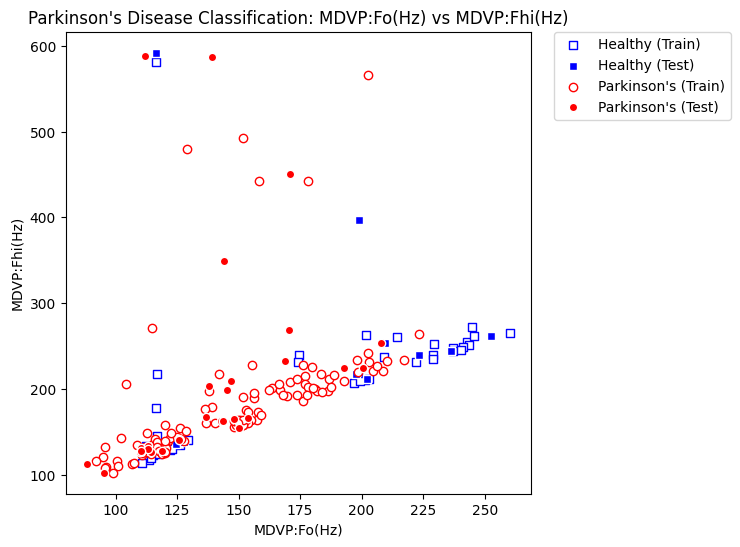

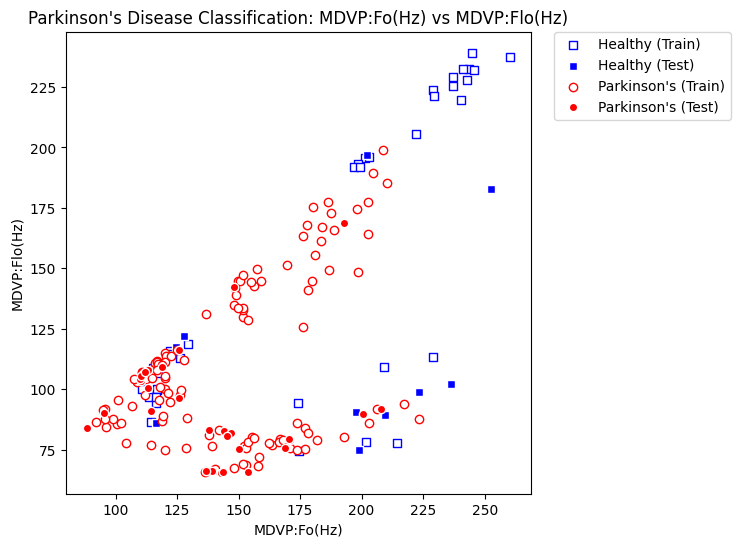

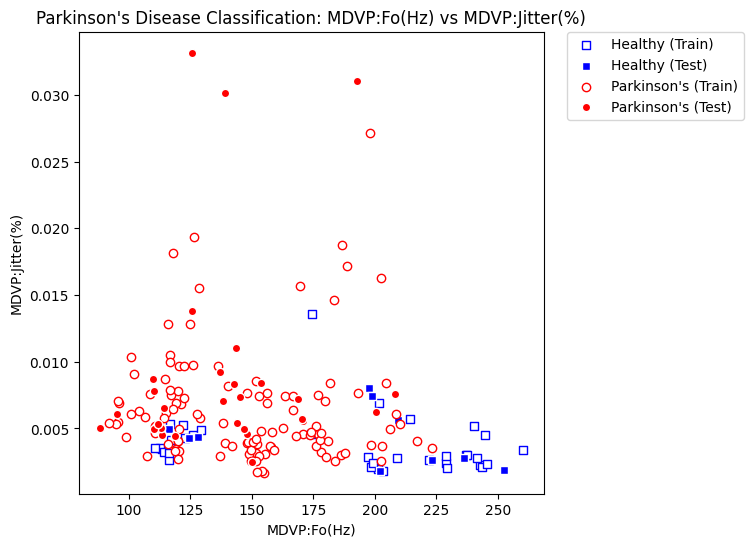

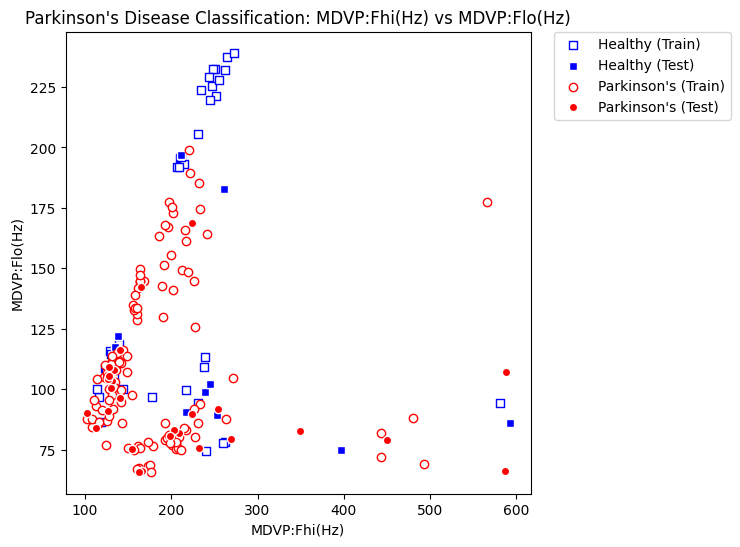

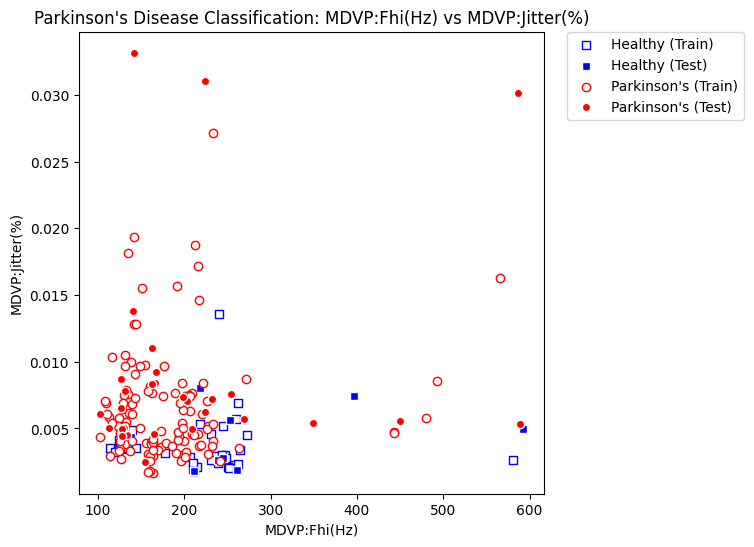

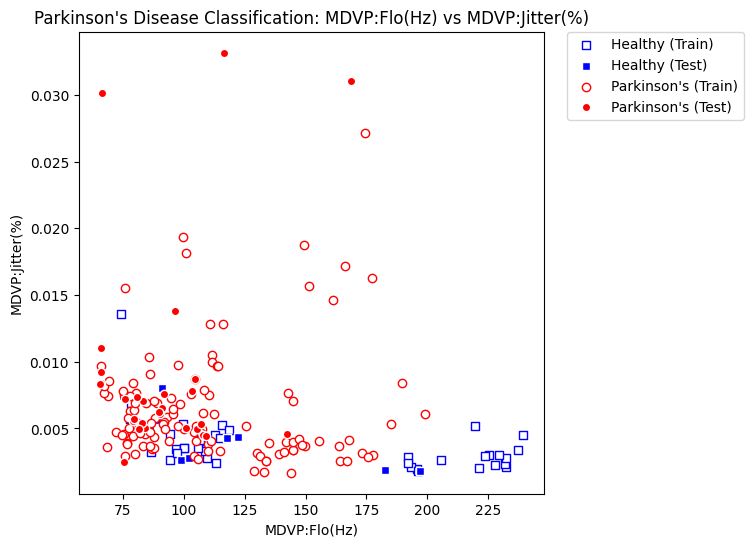

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Select multiple features
selected_features = [
    'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)'
]  # You can extend this list

# Generate all feature pairs
feature_pairs = list(itertools.combinations(selected_features, 2))

# Loop through feature pairs
for feature_x, feature_y in feature_pairs:
    train_x = train_features[:, X.columns.get_loc(feature_x)]
    train_y = train_features[:, X.columns.get_loc(feature_y)]
    test_x = test_features[:, X.columns.get_loc(feature_x)]
    test_y = test_features[:, X.columns.get_loc(feature_y)]

    plt.figure(figsize=(6, 6))

    # Plot Healthy (status = 0)
    plt.scatter(
        train_x[train_labels == 0], train_y[train_labels == 0],
        marker="s", facecolors="w", edgecolors="b", label="Healthy (Train)"
    )
    plt.scatter(
        test_x[test_labels == 0], test_y[test_labels == 0],
        marker="s", facecolors="b", edgecolors="w", label="Healthy (Test)"
    )

    # Plot Parkinson's (status = 1)
    plt.scatter(
        train_x[train_labels == 1], train_y[train_labels == 1],
        marker="o", facecolors="w", edgecolors="r", label="Parkinson's (Train)"
    )
    plt.scatter(
        test_x[test_labels == 1], test_y[test_labels == 1],
        marker="o", facecolors="r", edgecolors="w", label="Parkinson's (Test)"
    )

    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.title(f"Parkinson's Disease Classification: {feature_x} vs {feature_y}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.show()

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(156,)
(156,)
(39,)
(39,)


`ZZFeatureMap`
- is a quantum feature map that encodes classical data into a quantum circuit.
- It applies ZZ interactions (controlled-Z gates) to entangle qubits based on input data.

`Sampler`
- is a quantum primitive that runs quantum circuits and samples measurement outcomes.
- It’s used to estimate probabilities of different quantum states.


`ComputeUncompute`
- is a method for measuring state fidelity between two quantum states.
- It helps compute how similar two quantum states are, which is useful for kernel-based classification.


`FidelityQuantumKernel`
- defines a quantum kernel using a fidelity measure.
- It maps classical data into a quantum space and computes pairwise similarities using quantum state fidelity.

In [ ]:
X.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

# Select a subset of features (e.g., 2 most relevant features)
selected_features1 = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE']  # Choose based on feature importance

selected_features = ["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)"]

# Determine feature dimension
feature_dimension = len(selected_features)

# Define the feature map
parkinsons_feature_map = ZZFeatureMap(feature_dimension=feature_dimension, reps=2, entanglement="linear")

# Initialize quantum components
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)

# Define Quantum Kernel
parkinsons_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=parkinsons_feature_map)

<ipython-input-11-109392229f6c>:22: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


In [ ]:
from sklearn.svm import SVC
from datetime import datetime

# Capture initial time
start_time = datetime.now()

# Select only the chosen features for training and testing
X = df[["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)"]].values  # Using selected features
y = df["status"].values  # Target variable (0 = Healthy, 1 = Parkinson's)

# Split into training and test sets
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    X, y, test_size=0.2, random_state=algorithm_globals.random_seed
)

# Initialize and train SVM with the quantum kernel
parkinsons_svc = SVC(kernel=parkinsons_kernel.evaluate)

parkinsons_svc.fit(train_features, train_labels)

# Evaluate the classifier
parkinsons_score = parkinsons_svc.score(test_features, test_labels)

print(f"Callable kernel classification test score: {parkinsons_score:.4f}")

# Capture final time
end_time = datetime.now()

# Compute execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time}")

Callable kernel classification test score: 0.7436
Execution time: 0:00:54.651893


In [ ]:
parkinsons_matrix_train = parkinsons_kernel.evaluate(x_vec=train_features)
parkinsons_matrix_test = parkinsons_kernel.evaluate(x_vec=test_features, y_vec=train_features)

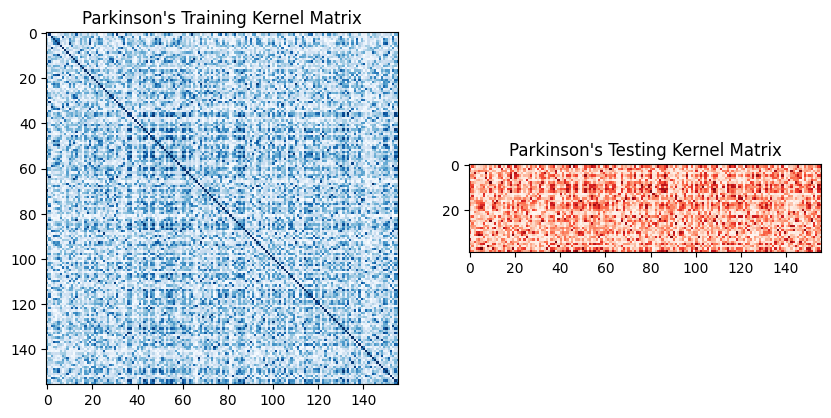

In [ ]:
# Visualize Training and Testing Kernel Matrices
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(np.asmatrix(parkinsons_matrix_train), interpolation="nearest", origin="upper", cmap="Blues")
axs[0].set_title("Parkinson's Training Kernel Matrix")

axs[1].imshow(np.asmatrix(parkinsons_matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Parkinson's Testing Kernel Matrix")

plt.show()

In [ ]:
# SVM Classification with Precomputed Kernel
parkinsons_svc = SVC(kernel="precomputed")
parkinsons_svc.fit(parkinsons_matrix_train, train_labels)
parkinsons_score_precomputed_kernel = parkinsons_svc.score(parkinsons_matrix_test, test_labels)

print(f"Precomputed kernel classification test score: {parkinsons_score_precomputed_kernel:.4f}")

Precomputed kernel classification test score: 0.7436


In [ ]:
from datetime import datetime
from qiskit_machine_learning.algorithms import QSVC

# Capture initial time
start_time = datetime.now()

# Train QSVC
qsvc = QSVC(quantum_kernel=parkinsons_kernel)
qsvc.fit(train_features, train_labels)
qsvc_score = qsvc.score(test_features, test_labels)

# Capture final time
end_time = datetime.now()

# Compute execution time
execution_time = end_time - start_time

print(f"QSVC classification test score: {qsvc_score:.4f}")
print(f"Execution time: {execution_time}")

QSVC classification test score: 0.7436
Execution time: 0:00:44.743642


In [ ]:
# Accuracy Summary
print(f"Classification Model                    | Accuracy Score")
print(f"---------------------------------------------------------")
print(f"SVC using precomputed kernel matrix     | {parkinsons_score_precomputed_kernel:10.2f}")
print(f"QSVC                                    | {qsvc_score:10.2f}")

Classification Model                    | Accuracy Score
---------------------------------------------------------
SVC using precomputed kernel matrix     |       0.74
QSVC                                    |       0.74


In [ ]:
# Clustering with Spectral Clustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score
parkinsons_spectral = SpectralClustering(2, affinity="precomputed")
cluster_labels = parkinsons_spectral.fit_predict(parkinsons_matrix_train)
cluster_score = normalized_mutual_info_score(cluster_labels, train_labels)

print(f"Clustering score: {cluster_score:.4f}")

Clustering score: 0.0035
